# Part II: Data Cleansing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [3]:
df = pd.read_pickle("../data/housing_step1.csv")

In [10]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Exploring possible outliers...

<Axes: >

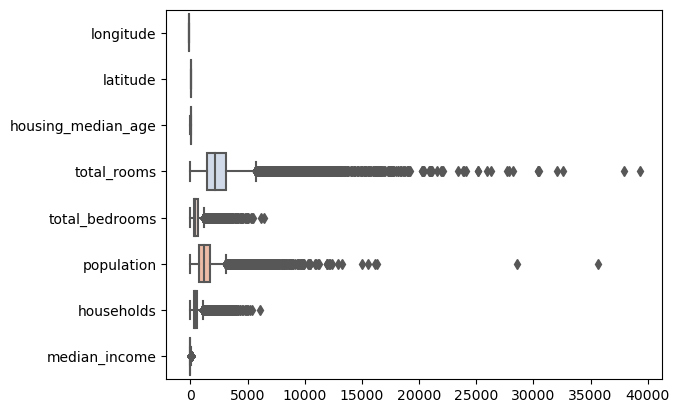

In [9]:
sns.boxplot(df.drop('median_house_value', axis=1), palette='coolwarm', orient='h')

In [11]:
df["total_rooms"].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

<Axes: >

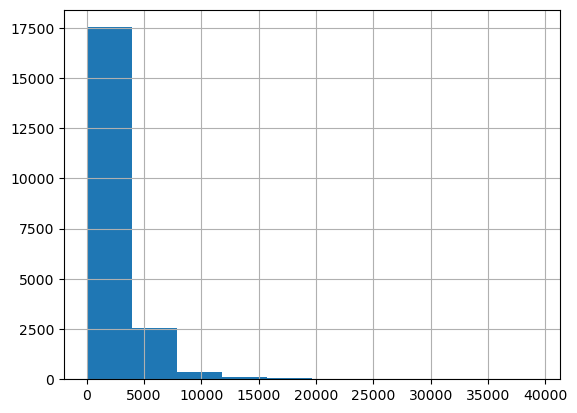

In [12]:
df["total_rooms"].hist()

## Attributes Combinations

In [17]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"] = df["population"]/df["households"]

In [18]:
df["log_total_rooms"] = np.log(df["total_rooms"])

<Axes: >

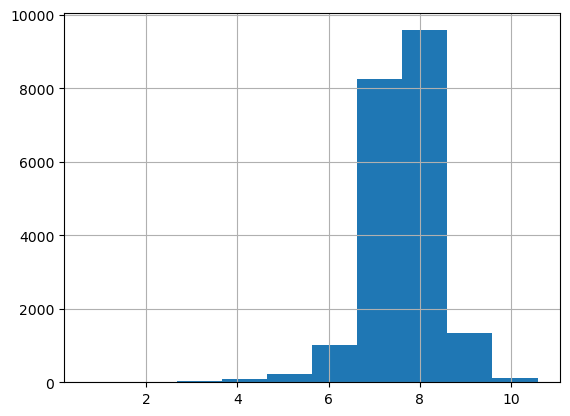

In [19]:
df["log_total_rooms"].hist()

## Handling missing values

In [24]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
log_total_rooms               0
dtype: int64

In [30]:
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)
df["bedrooms_per_room"].fillna(df["bedrooms_per_room"].median(), inplace=True)
df.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
log_total_rooms             0
dtype: int64

## Handling text and categorical features

In [34]:
df_cat = df.select_dtypes(include=['object'])

In [41]:
# Alternative-1: OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)

In [44]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [46]:
df_cat_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [45]:
# Alternative-2: OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
df_cat_1hot = one_hot_encoder.fit_transform(df_cat)

In [50]:
df_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [65]:
df = pd.get_dummies(df)

## Scaling dataset

In [62]:
from sklearn.preprocessing import StandardScaler

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

In [63]:
df_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,log_total_rooms
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.628559,-1.149930,-0.049597,-1.129255
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.327041,-0.990381,-0.092512,1.648839
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,1.155620,-1.445865,-0.025843,-0.449227
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.493627,-0.050329,-0.636925
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.707889,-0.085616,-0.311482
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388283,-0.512592,-0.443449,-1.216128,-1.115804,-0.155023,0.202517,-0.049110,-0.280761
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.922403,-0.944405,-1.008420,-0.691593,-1.124470,0.276881,0.039312,0.005021,-1.439476
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.123608,-0.369537,-0.174042,-1.142593,-0.992746,-0.090318,0.038706,-0.071735,0.122265
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.304827,-0.604429,-0.393753,-1.054583,-1.058608,-0.040211,0.120501,-0.091225,-0.133391


In [80]:
df_bool = df.select_dtypes(include="bool")
final_df = df_num.join(df_bool).astype(float)

In [82]:
final_df.to_pickle("../data/housing_step2.csv")